# Ques 1

---------------OR----------------------
[INFO] training perceptron...
Learning Rate: 0.5368275696133007
Learning Rate: 0.8590204787416102
Learning Rate: 0.3203605489303447
Learning Rate: 0.0271187023250139
Learning Rate: 0.5009547774496397


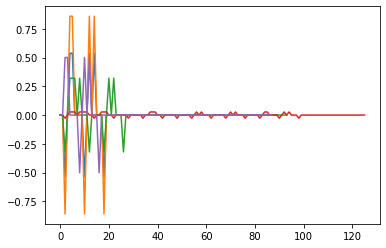

[INFO] testing perceptron...
[INFO] data=[0 0], ground-truth=0, pred=0
[INFO] data=[0 1], ground-truth=1, pred=1
[INFO] data=[1 0], ground-truth=1, pred=1
[INFO] data=[1 1], ground-truth=1, pred=1
---------------AND----------------------
[INFO] training perceptron...
Learning Rate: 0.2712302769752084
Learning Rate: 0.9623499649482439
Learning Rate: 0.8184810341636736
Learning Rate: 0.13717704712494494
Learning Rate: 0.9729795299148213


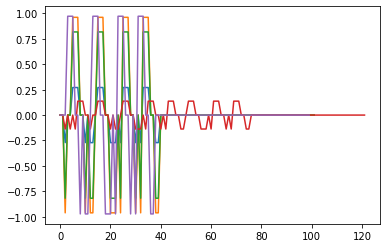

[INFO] testing perceptron...
[INFO] data=[0 0], ground-truth=0, pred=0
[INFO] data=[0 1], ground-truth=0, pred=0
[INFO] data=[1 0], ground-truth=0, pred=0
[INFO] data=[1 1], ground-truth=1, pred=1


In [2]:
# import the necessary packages
import numpy as np
import random
import matplotlib.pyplot as plt

class Perceptron:
    def __init__(self, N, alpha=0.1):
        # initialize the weight matrix and store the learning rate
        self.W=[]
        for i in range(N+1):
            self.W.append(round(random.uniform(-0.3, 0.3), 2))
        self.alpha = alpha

    def step(self, x):
        # apply the step function
        return 1 if x > 0 else 0

    def fit(self, X, y, epochs=10):
        costs=[]
        # insert a column of 1's as the last entry in the feature
        # matrix -- this little trick allows us to treat the bias
        # as a trainable parameter within the weight matrix
        X = np.c_[X, np.ones((X.shape[0]))]

        # loop over the desired number of epochs
        for epoch in np.arange(0, epochs):
            # loop over each individual data point
            for (x, target) in zip(X, y):
                # take the dot product between the input features
                # and the weight matrix, then pass this value
                # through the step function to obtain the prediction
                p = self.step(np.dot(x, self.W))
                # only perform a weight update if our prediction
                # does not match the target
                if p != target:
                    # determine the error
                    error = p - target
                    # update the weight matrix
                    delta = -self.alpha * error * x
                    self.W += delta
                    
                    for k in delta:
                        costs.append(k)
                else:
                    costs.append(0)
        return costs

    def predict(self, X, addBias=True):
        # ensure our input is a matrix
        X = np.atleast_2d(X)
        # check to see if the bias column should be added
        if addBias:
            # insert a column of 1's as the last entry in the feature
            # matrix (bias)
            X = np.c_[X, np.ones((X.shape[0]))]
        # take the dot product between the input features and the
        # weight matrix, then pass the value through the step
        # function
        return self.step(np.dot(X, self.W))


# construct the OR dataset
print("---------------OR----------------------")
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [1]])
# define our perceptron and train it
print("[INFO] training perceptron...")


for i in range(5):
    #initialize learning rate
    alpha = random.random()
    print("Learning Rate: " + str(alpha))
    p = Perceptron(X.shape[1], alpha=alpha)
    costs = p.fit(X, y, epochs=20)
    plt.plot(costs)

plt.show()

# now that our perceptron is trained we can evaluate it
print("[INFO] testing perceptron...")
# now that our network is trained, loop over the data points
for (x, target) in zip(X, y):
    # make a prediction on the data point and display the result
    # to our console
    pred = p.predict(x)
    print("[INFO] data={}, ground-truth={}, pred={}".format(
        x, target[0], pred))


# construct the OR dataset
print("---------------AND----------------------")
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [0], [0], [1]])
# define our perceptron and train it
print("[INFO] training perceptron...")


for i in range(5):
    #initialize learning rate
    alpha = random.random()
    print("Learning Rate: " + str(alpha))
    p = Perceptron(X.shape[1], alpha=alpha)
    costs = p.fit(X, y, epochs=20)
    plt.plot(costs)

plt.show()

# now that our perceptron is trained we can evaluate it
print("[INFO] testing perceptron...")
# now that our network is trained, loop over the data points
for (x, target) in zip(X, y):
    # make a prediction on the data point and display the result
    # to our console
    pred = p.predict(x)
    print("[INFO] data={}, ground-truth={}, pred={}".format(
        x, target[0], pred))

# Ques 2

In [3]:
lr = 0.05

bias_ih = 1
w11_ih = 0.1
w12_ih = 0.3
w21_ih = 0.25
w22_ih = 0.8

In [4]:
bias_hj = 1
w11_hj = 0.2
w12_hj = 0.6
w21_hj = 0.4
w22_hj = 0.7


In [10]:
import math
x1 = 0.3
x2 = 0.8

y1 = 0.05
y2 = 0.6

def sigmoid(val):
    return 1/(1+exp(-1*val))

In [13]:
while True:
    #Step 1 input to hidden 
    h1 = sigmoid(bias_ih + w11_ih*x1 + w21_ih*x2)
    h2 = sigmoid(bias_ih + w12_ih*x1 + w22_ih*x2)

    #Step 2 hidden to ouput

    ypred1 = sigmoid(bias_hj + w11_hj*h1 + w21_hj*h2)
    ypred2 = sigmoid(bias_hj + w11_hj*h1 + w21_hj*h2)

    #Step 3 error calculation

    mse  = (pow(y1-sigmoid(ypred1),2) + pow(y2-sigmoid(ypred2),2))/2

    #Step 4 Weight update output to hidden

    w11_hj+= 0.1*(y1-sigmoid(ypred1))*sigmoid(ypred1)*(1-sigmoid(ypred1))*h1
    w12_hj+= 0.1*(y2-sigmoid(ypred2))*sigmoid(ypred2)*(1-sigmoid(ypred2))*h1
    w21_hj+= 0.1*(y1-sigmoid(ypred1))*sigmoid(ypred1)*(1-sigmoid(ypred1))*h2
    w22_hj+= 0.1*(y2-sigmoid(ypred2))*sigmoid(ypred2)*(1-sigmoid(ypred2))*h2

    #Step 5 Weight update hidden to input

    op_hl_sum = (y1-sigmoid(ypred1))*sigmoid(ypred1)*(1-sigmoid(ypred1))*w11_hj + (y2-sigmoid(ypred2))*sigmoid(ypred2)*(1-sigmoid(ypred2))*w12_hj + (y1-sigmoid(ypred1))*sigmoid(ypred1)*(1-sigmoid(ypred1))*w21_hj + (y2-sigmoid(ypred2))*sigmoid(ypred2)*(1-sigmoid(ypred2))*w22_hj

    w11_ih += 0.1*op_hl_sum*h1*(1-h1)*x1
    w12_ih += 0.1*op_hl_sum*h2*(1-h2)*x1
    w21_ih += 0.1*op_hl_sum*h1*(1-h1)*x2
    w22_ih += 0.1*op_hl_sum*h2*(1-h2)*x2

    mse  = (pow(y1-sigmoid(ypred1),2) + pow(y2-sigmoid(ypred2),2))/2
    print(mse)
    if mse<=0.15 : break

0.21145227035129502
0.21102432745328067
0.21059198628222453
0.21015524511386616
0.20971410349880212
0.209268562296324
0.20881862370840837
0.20836429131382106
0.20790557010229724
0.20744246650875417
0.20697498844749215
0.20650314534633651
0.2060269481806729
0.20554640950731998
0.20506154349819003
0.2045723659736764
0.20407889443570987
0.2035811481004227
0.2030791479303537
0.2025729166661295
0.20206247885755182
0.2015478608940185
0.2010290910342054
0.2005061994349324
0.19997921817913544
0.19944818130286418
0.19891312482122375
0.1983740867531763
0.19783110714511698
0.19728422809313764
0.19673349376389063
0.1961789504139637
0.1956206464076745
0.19505863223319722
0.19449296051692783
0.193923686035999
0.19335086572885282
0.19277455870378235
0.1921948262453512
0.19161173181860514
0.191025341070986
0.19043572183186658
0.18984294410961966
0.18924708008614521
0.1886482041087744
0.18804639267947948
0.1874417244413169
0.1868342801620391
0.18622414271481183
0.18561139705598
0.18499613019983166
0.18